In [4]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

In [5]:
mp_holistic = mp.solutions.holistic 
mp_drawing = mp.solutions.drawing_utils 

In [6]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) 
    image.flags.writeable = False                  
    results = model.process(image)                 
    image.flags.writeable = True                   
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) 
    return image, results

In [7]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION) 
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) 
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) 
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)

In [8]:
def draw_styled_landmarks(image, results):

    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 

    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 

    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [9]:
cap = cv2.VideoCapture(0)
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        ret, frame = cap.read()

        image, results = mediapipe_detection(frame, holistic)
#         print(results)
        
        draw_styled_landmarks(image, results)

        cv2.imshow('OpenCV Feed', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

In [ ]:
cap.release()
cv2.destroyAllWindows()

In [10]:
draw_landmarks(frame, results)

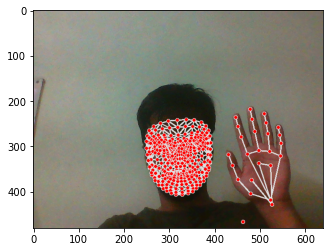

In [11]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [12]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [13]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [14]:
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)

In [15]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [16]:
result_test = extract_keypoints(results)

In [17]:
result_test

array([ 0.48051602,  0.669406  , -0.71325725, ...,  0.        ,
        0.        ,  0.        ])

In [18]:
np.save('0', result_test)

In [19]:
np.load('0.npy')

array([ 0.48051602,  0.669406  , -0.71325725, ...,  0.        ,
        0.        ,  0.        ])

In [23]:
DATA_PATH = os.path.join('MP_Data') 

actions = np.array(['hello', 'thanks', 'iloveyou'])

no_sequences = 30

sequence_length = 30

start_folder = 0

for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

In [24]:
cap = cv2.VideoCapture(0)
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:

    for action in actions:
        for sequence in range(start_folder, start_folder+no_sequences):
            for frame_num in range(sequence_length):

                ret, frame = cap.read()

                image, results = mediapipe_detection(frame, holistic)

                draw_styled_landmarks(image, results)
                
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 1, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(2000)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                                
                    cv2.imshow('OpenCV Feed', image)
                
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

In [20]:
cap.release()
cv2.destroyAllWindows()

In [25]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [26]:
label_map = {label:num for num, label in enumerate(actions)}

In [27]:
label_map

{'hello': 0, 'thanks': 1, 'iloveyou': 2}

In [28]:
sequences, labels = [], []
for action in actions:
    for sequence in np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [31]:
X = np.array(sequences)

In [32]:
y = to_categorical(labels).astype(int)

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [40]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [41]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [42]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [43]:
model.fit(X_train, y_train, epochs=400, callbacks=[tb_callback])

Epoch 1/400
3/3 [==============================] - 11s 3s/step - loss: 2.6673 - categorical_accuracy: 0.3412
Epoch 2/400
3/3 [==============================] - 0s 94ms/step - loss: 1.2965 - categorical_accuracy: 0.3176
Epoch 3/400
3/3 [==============================] - 0s 102ms/step - loss: 1.0823 - categorical_accuracy: 0.3765
Epoch 4/400
3/3 [==============================] - 0s 94ms/step - loss: 0.9274 - categorical_accuracy: 0.5647
Epoch 5/400
3/3 [==============================] - 0s 109ms/step - loss: 1.0206 - categorical_accuracy: 0.5176
Epoch 6/400
3/3 [==============================] - 0s 94ms/step - loss: 1.3146 - categorical_accuracy: 0.3882
Epoch 7/400
3/3 [==============================] - 0s 94ms/step - loss: 0.9752 - categorical_accuracy: 0.3294
Epoch 8/400
3/3 [==============================] - 0s 130ms/step - loss: 0.9394 - categorical_accuracy: 0.5765
Epoch 9/400
3/3 [==============================] - 0s 102ms/step - loss: 0.7408 - categorical_accuracy: 0.5765
Epoch 1

3/3 [==============================] - 0s 119ms/step - loss: 0.4373 - categorical_accuracy: 0.8353
Epoch 75/400
3/3 [==============================] - 0s 138ms/step - loss: 0.4113 - categorical_accuracy: 0.8235
Epoch 76/400
3/3 [==============================] - 0s 106ms/step - loss: 0.4108 - categorical_accuracy: 0.7647
Epoch 77/400
3/3 [==============================] - 0s 112ms/step - loss: 0.3913 - categorical_accuracy: 0.8000
Epoch 78/400
3/3 [==============================] - 0s 111ms/step - loss: 0.3901 - categorical_accuracy: 0.8471
Epoch 79/400
3/3 [==============================] - 0s 109ms/step - loss: 0.3909 - categorical_accuracy: 0.8118
Epoch 80/400
3/3 [==============================] - 0s 113ms/step - loss: 0.3737 - categorical_accuracy: 0.8353
Epoch 81/400
3/3 [==============================] - 0s 106ms/step - loss: 0.3576 - categorical_accuracy: 0.8941
Epoch 82/400
3/3 [==============================] - 0s 110ms/step - loss: 0.3720 - categorical_accuracy: 0.8941
Epoch

3/3 [==============================] - 0s 118ms/step - loss: 0.4405 - categorical_accuracy: 0.7647
Epoch 147/400
3/3 [==============================] - 0s 162ms/step - loss: 0.4202 - categorical_accuracy: 0.7765
Epoch 148/400
3/3 [==============================] - 0s 109ms/step - loss: 0.4165 - categorical_accuracy: 0.8000
Epoch 149/400
3/3 [==============================] - 0s 140ms/step - loss: 0.4078 - categorical_accuracy: 0.7882
Epoch 150/400
3/3 [==============================] - 0s 145ms/step - loss: 0.4221 - categorical_accuracy: 0.8000
Epoch 151/400
3/3 [==============================] - 0s 112ms/step - loss: 0.4366 - categorical_accuracy: 0.7765
Epoch 152/400
3/3 [==============================] - 0s 118ms/step - loss: 0.4382 - categorical_accuracy: 0.7176
Epoch 153/400
3/3 [==============================] - 0s 114ms/step - loss: 0.4654 - categorical_accuracy: 0.6941
Epoch 154/400
3/3 [==============================] - 0s 139ms/step - loss: 0.4395 - categorical_accuracy: 0.74

3/3 [==============================] - 0s 120ms/step - loss: 0.3617 - categorical_accuracy: 0.8824
Epoch 219/400
3/3 [==============================] - 1s 239ms/step - loss: 0.3002 - categorical_accuracy: 0.8824
Epoch 220/400
3/3 [==============================] - 0s 116ms/step - loss: 0.2070 - categorical_accuracy: 0.9059
Epoch 221/400
3/3 [==============================] - 0s 127ms/step - loss: 0.2268 - categorical_accuracy: 0.8824
Epoch 222/400
3/3 [==============================] - 0s 120ms/step - loss: 0.1911 - categorical_accuracy: 0.9294
Epoch 223/400
3/3 [==============================] - 0s 116ms/step - loss: 0.2161 - categorical_accuracy: 0.9176
Epoch 224/400
3/3 [==============================] - 0s 138ms/step - loss: 0.1833 - categorical_accuracy: 0.9529
Epoch 225/400
3/3 [==============================] - 1s 167ms/step - loss: 0.1794 - categorical_accuracy: 0.9412
Epoch 226/400
3/3 [==============================] - 0s 122ms/step - loss: 0.1580 - categorical_accuracy: 0.95

3/3 [==============================] - 0s 114ms/step - loss: 0.0169 - categorical_accuracy: 1.0000
Epoch 291/400
3/3 [==============================] - 0s 110ms/step - loss: 0.0169 - categorical_accuracy: 1.0000
Epoch 292/400
3/3 [==============================] - 0s 124ms/step - loss: 0.0177 - categorical_accuracy: 1.0000
Epoch 293/400
3/3 [==============================] - 0s 120ms/step - loss: 0.0175 - categorical_accuracy: 0.9882
Epoch 294/400
3/3 [==============================] - 0s 112ms/step - loss: 0.0227 - categorical_accuracy: 1.0000
Epoch 295/400
3/3 [==============================] - 0s 114ms/step - loss: 0.0271 - categorical_accuracy: 0.9882
Epoch 296/400
3/3 [==============================] - 0s 108ms/step - loss: 0.0105 - categorical_accuracy: 1.0000
Epoch 297/400
3/3 [==============================] - 0s 115ms/step - loss: 0.0077 - categorical_accuracy: 1.0000
Epoch 298/400
3/3 [==============================] - 0s 106ms/step - loss: 0.0080 - categorical_accuracy: 1.00

3/3 [==============================] - 0s 111ms/step - loss: 0.0227 - categorical_accuracy: 0.9882
Epoch 363/400
3/3 [==============================] - 0s 149ms/step - loss: 0.0182 - categorical_accuracy: 1.0000
Epoch 364/400
3/3 [==============================] - 0s 145ms/step - loss: 0.0156 - categorical_accuracy: 1.0000
Epoch 365/400
3/3 [==============================] - 0s 118ms/step - loss: 0.0140 - categorical_accuracy: 1.0000
Epoch 366/400
3/3 [==============================] - 0s 147ms/step - loss: 0.0133 - categorical_accuracy: 1.0000
Epoch 367/400
3/3 [==============================] - 0s 112ms/step - loss: 0.0134 - categorical_accuracy: 1.0000
Epoch 368/400
3/3 [==============================] - 0s 106ms/step - loss: 0.0116 - categorical_accuracy: 1.0000
Epoch 369/400
3/3 [==============================] - 0s 158ms/step - loss: 0.0119 - categorical_accuracy: 1.0000
Epoch 370/400
3/3 [==============================] - 0s 148ms/step - loss: 0.0093 - categorical_accuracy: 1.00

In [44]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 30, 64)            442112    
_________________________________________________________________
lstm_4 (LSTM)                (None, 30, 128)           98816     
_________________________________________________________________
lstm_5 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_4 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 99        
Total params: 596,675
Trainable params: 596,675
Non-trainable params: 0
________________________________________________

In [45]:
res = model.predict(X_test)

In [46]:
actions[np.argmax(res[4])]

'thanks'

In [47]:
actions[np.argmax(y_test[4])]

'thanks'

In [48]:
model.save('action.h5')

In [49]:
model.load_weights('action.h5')

In [50]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [51]:
yhat = model.predict(X_test)

In [52]:
ytrue = np.argmax(y_test, axis=1).tolist()

In [55]:
yhat = np.argmax(yhat, axis=1).tolist()

In [56]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[2, 0],
        [0, 3]],

       [[4, 0],
        [0, 1]],

       [[4, 0],
        [0, 1]]], dtype=int64)

In [57]:
accuracy_score(ytrue, yhat)

1.0

In [58]:
from scipy import stats

In [59]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [60]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))

TypeError: only size-1 arrays can be converted to Python scalars

<Figure size 1296x1296 with 0 Axes>

In [61]:
sequence = []
sentence = []
predictions = []
threshold = 0.5

cap = cv2.VideoCapture(0)
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        ret, frame = cap.read()

        image, results = mediapipe_detection(frame, holistic)
        print(results)
  
        draw_styled_landmarks(image, results)
        
        keypoints = extract_keypoints(results)
#         sequence.insert(0, keypoints)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            
            
            if np.unique(predictions[-10:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        cv2.imshow('OpenCV Feed', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<

thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution

iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<

hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'media

iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe

iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<

In [ ]:
cap.release()
cv2.destroyAllWindows()